In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pytorch_lightning as pl
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import random_split, DataLoader
from torchvision import transforms

%matplotlib inline

In [30]:
# Dataset
from torchvision import datasets
flowers_orig = datasets.Flowers102('./data', download=True)

# Show sizes
def analyze_size(imgs):
	flowers_sizes = pd.DataFrame([img.size for img, _ in imgs])
	flowers_sizes.columns = ['height', 'width']
	grouped_df = flowers_sizes.groupby(["height", "width"]).size().reset_index(name='count')
	display(grouped_df.head()) # Images don't have same sizes
	# show min width and height
	print("min height", flowers_sizes["height"].min())
	print("min width", flowers_sizes["width"].min())

analyze_size(flowers_orig)

,height,width,count
0,500,500,12
1,500,501,1
2,500,502,3
3,500,505,4
4,500,506,1


min height 500
min width 500


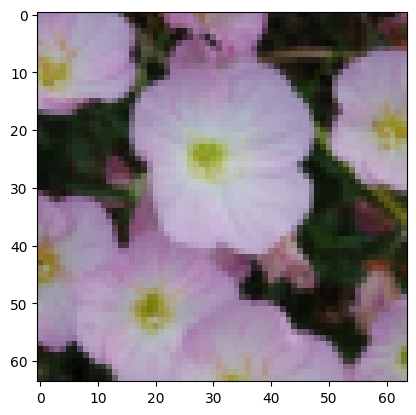

In [38]:
# Crop to same size
# Resize for consumer gpu
# To tensor for neural network
from torchvision.transforms.v2 import CenterCrop
flowerTensors = datasets.Flowers102('./data', download=True, transform=transforms.Compose([
	transforms.CenterCrop(500),
	transforms.Resize(64),
	transforms.ToTensor(),
	transforms.Lambda(lambda img: (img - 0.5) * 2)
]))

# Reverse transform
tensorToImage = transforms.Compose([
	transforms.Lambda(lambda img: img / 2 + 0.5),
	transforms.Lambda(lambda img: img.permute(1, 2, 0).numpy() * 255),
	transforms.Lambda(lambda img: img.astype(np.uint8))
])

plt.imshow(tensorToImage(flowerTensors[0][0]))

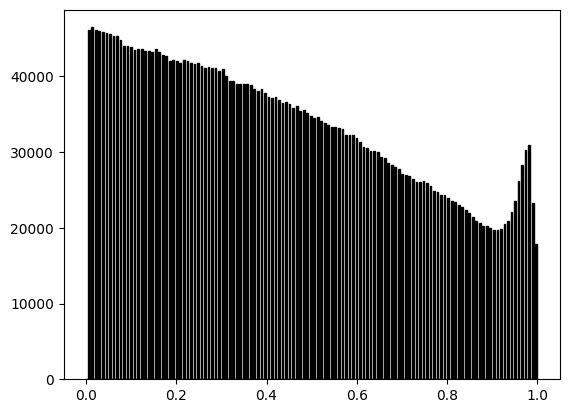

In [41]:
# TODO átnéz

# show distribution of pixels in a histogram
def show_histogram(img):
	plt.hist(img.flatten(), bins=256, range=(0, 1), fc='k', ec='k')
	plt.show()
# show distribution of the pixels of all images
def show_all_histograms(imgs):
	all_imgs = torch.stack([img for img, _ in imgs])
	show_histogram(all_imgs)

show_all_histograms(flowerTensors)

In [11]:



# T db gauss zaj hozzáadás: várh érték függ az előző képtől?: https://huggingface.co/blog/annotated-diffusion
# variancia változik minden üzemben (~learning rate schedule)

# adat normalizálás (rgb)


# Releváns laborok: Gépi labor 4. VAE

,0,1
0,754,500
1,624,500
2,667,500
3,750,500
4,500,714


                 0            1
count  1020.000000  1020.000000
mean    624.489216   537.775490
std      97.422428    79.235897
min     500.000000   500.000000
25%     500.000000   500.000000
50%     666.000000   500.000000
75%     685.250000   513.250000
max     919.000000   993.000000


,0,1,count
0,500,500,12
1,500,501,1
2,500,502,3
3,500,505,4
4,500,506,1


       0    1  count
0    500  500     12
1    500  501      1
2    500  502      3
3    500  505      4
4    500  506      1
..   ...  ...    ...
358  827  500      1
359  839  500      1
360  845  500      2
361  857  500      1
362  919  500      1

[363 rows x 3 columns]
